In [67]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/df_indi_works.csv', index_col = [0])
data = data[data["count_works"].isin({0, 1, 2})]  # Not more ?
data['count_works'][data['count_works']==0] = 1


regions = pd.read_csv(
    "../data/ENS - Cultural Index - Countries Databases - region_level.csv"
)
regions["region_name"][regions["region_name"] == "Slav world"] = "East Slavic"

regions = regions[regions["level"] == 2]
regions = set(regions["region_name"])
df = data[data["region_name"].isin(regions)]
df = df[df['decade']<=1870]

/var/folders/lx/9b13r6ln63jb54_3xlf9b_380000gn/T/ipykernel_69066/1343596998.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions["region_name"][regions["region_name"] == "Slav world"] = "East Slavic"


In [73]:
df[(df['region_name']=='Central Europe')&(df['count_works']==2)]

,individual_wikidata_id,decade,individual_name,score,region_name,count_works
2850,Q274324,1870,Jadwiga Łuszczewska,26,Central Europe,2.0
7174,Q4317486,1860,Władysław Nehring,27,Central Europe,2.0
7594,Q11919364,1820,Henryk Zabiełło,8,Central Europe,2.0
8130,Q77219,1840,Hermann Grassmann,53,Central Europe,2.0
9960,Q28671913,1630,Helmich van Tweenhuysen II,2,Central Europe,2.0
...,...,...,...,...,...,...
519674,Q349948,1770,Adam Kazimierz Czartoryski,42,Central Europe,2.0
523105,Q12023129,1870,Jan Strakatý,8,Central Europe,2.0
523638,Q727629,1800,Jakub Jan Ryba,47,Central Europe,2.0
528757,Q114229,1550,Johann Placotomus,29,Central Europe,2.0


In [74]:
df['count_works'].value_counts()

count_works
1.0    131619
2.0      5454
Name: count, dtype: int64

In [75]:
df_f0 = df[df['count_works']==1]
total_f0 = df_f0.groupby('region_name')['count_works'].sum()
total_counts = df.groupby('region_name')['count_works'].sum()

final = total_f0 / total_counts
final = final.reset_index()
final = final.rename(columns={'count_works': 'coverage'})
final = final.sort_values(by='coverage', ascending=True)

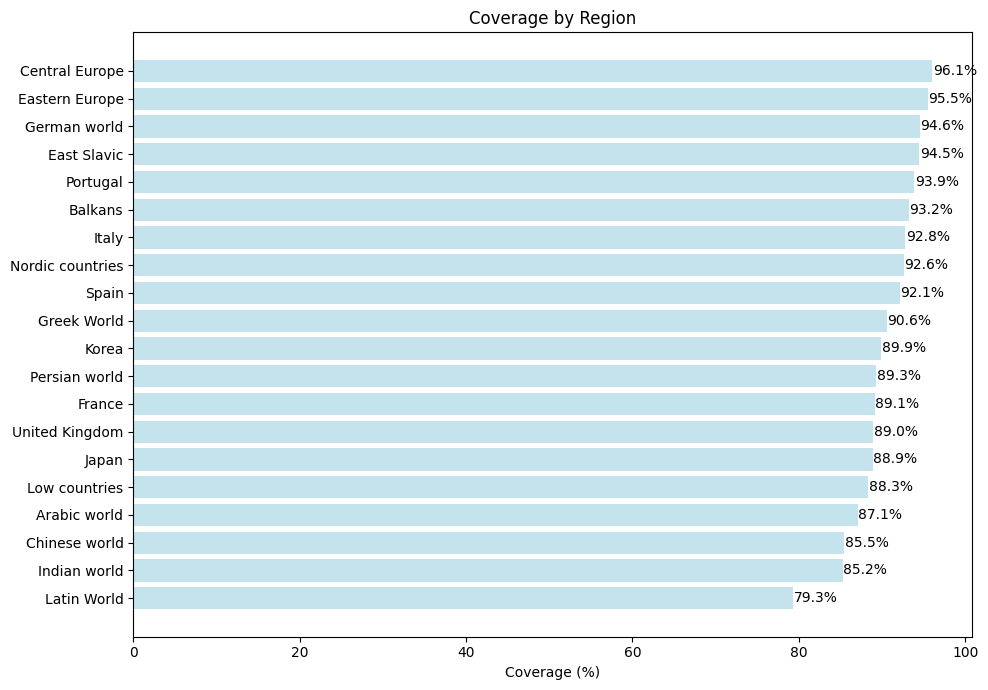

In [76]:

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(final['region_name'], final['coverage']*100, color='lightblue', alpha=0.7)

ax.set_xlabel('Coverage (%)')
ax.set_ylabel('')
ax.set_title('Coverage by Region')

# Add values at the end of each bar
for bar in bars:
    width = bar.get_width()
    label = f'{width:.1f}%'
    x_pos = width + 0.05
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(x_pos, y_pos, label, ha='left', va='center')
plt.tight_layout()
plt.show()



In [47]:
total_f0

region_name
Arabic world         1272.0
Balkans              1471.0
Central Europe       9629.0
Chinese world        1523.0
East Slavic          4180.0
Eastern Europe      16570.0
France              18825.0
German world        34606.0
Greek World          1363.0
Indian world          406.0
Italy               15033.0
Japan                1278.0
Korea                 199.0
Latin World           315.0
Low countries        8276.0
Nordic countries     6325.0
Persian world         499.0
Portugal              856.0
Spain                5500.0
United Kingdom      12101.0
Name: count_works, dtype: float64